In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords

In [3]:
# Read data
header_names = ['id', 'title', 'text', 'labels']
input_data = pd.read_csv('training_data.tsv', sep='\t', names=header_names)

In [4]:
# Cleaning

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html5lib')
    return soup.get_text()

# Remove HTML Tags
# input_data['text'] = input_data['text'].apply(remove_html_tags)
input_data['text'] = input_data['text'].str.replace(r'<[^<>]*>', '', regex=True)

# Convert to Lowercase
input_data['text'] = input_data['text'].apply(lambda x: x.lower())

# Remove punctuations
input_data['text'] = input_data['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove numbers from the text column
input_data['text'] = input_data['text'].apply(lambda x: re.sub(r'\d+', '', x))
input_data.to_csv('training_data_cleaned.csv')

In [ ]:
input_data = pd.read_csv('training_data_cleaned.csv')

# Split the words and flatten the list
split_words = input_data['text'].str.split(' ').explode()

# Count the frequency of each unique word
frequency = split_words.value_counts()
print(frequency)

frequency.to_csv('frequency.csv')

/var/folders/2v/qy72_8_x4rlf7p8462tnd8lc0000gn/T/ipykernel_78579/2407263452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_frequency['count'] = subset_frequency['count']/1000000


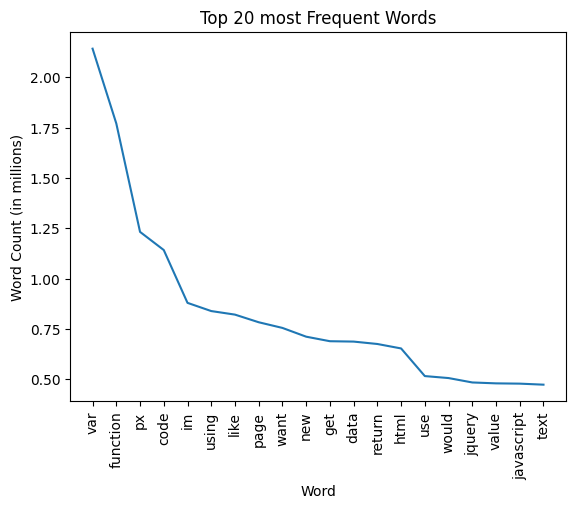

In [22]:
frequency = pd.read_csv('frequency.csv')
frequency.dropna(inplace=True)

stop_words = set(stopwords.words('english'))

frequency = frequency[~frequency['text'].isin(stop_words)]
subset_frequency = frequency[:20]

subset_frequency['count'] = subset_frequency['count']/1000000

# Plot the line chart
plt.plot(subset_frequency['text'], subset_frequency['count'])

# Set labels and title
plt.xlabel('Word')
plt.ylabel('Word Count (in millions)')
plt.title('Top 20 most Frequent Words')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Display the chart
plt.show()